In [ ]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [ ]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/rockpaperscissors/rps-cv-images'
train_dir = base_dir
validation_dir = base_dir

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=16,
        subset = 'training',
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        batch_size=16,
        subset = 'validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[checkpoint])

Epoch 1/25
25/25 - 7s - loss: 1.3254 - accuracy: 0.3550 - val_loss: 1.0939 - val_accuracy: 0.4750

Epoch 00001: saving model to model_checkpoints/
Epoch 2/25
25/25 - 6s - loss: 1.0271 - accuracy: 0.4611 - val_loss: 0.9758 - val_accuracy: 0.5125

Epoch 00002: saving model to model_checkpoints/
Epoch 3/25
25/25 - 6s - loss: 0.7540 - accuracy: 0.7175 - val_loss: 0.6116 - val_accuracy: 0.7250

Epoch 00003: saving model to model_checkpoints/
Epoch 4/25
25/25 - 6s - loss: 0.4102 - accuracy: 0.8705 - val_loss: 0.6008 - val_accuracy: 0.7500

Epoch 00004: saving model to model_checkpoints/
Epoch 5/25
25/25 - 7s - loss: 0.3687 - accuracy: 0.8600 - val_loss: 0.1349 - val_accuracy: 0.9625

Epoch 00005: saving model to model_checkpoints/
Epoch 6/25
25/25 - 6s - loss: 0.2924 - accuracy: 0.9093 - val_loss: 0.2465 - val_accuracy: 0.9000

Epoch 00006: saving model to model_checkpoints/
Epoch 7/25
25/25 - 6s - loss: 0.2971 - accuracy: 0.8990 - val_loss: 0.4593 - val_accuracy: 0.8625

Epoch 00007: saving

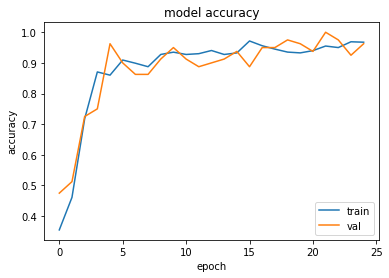

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
    test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

55/55 - 11s - loss: 0.1692 - accuracy: 0.9497
accuracy: 0.950


Saving 2f25VA1nfxiC86xj.png to 2f25VA1nfxiC86xj.png
2f25VA1nfxiC86xj.png
rock


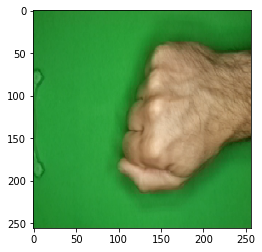

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(256,256))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')